In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import cufflinks as cf

%matplotlib inline

In [156]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [157]:
init_notebook_mode(connected=True)

In [158]:
cf.go_offline()

## Gathering, joining, and cleaning

In [159]:
#I'm interested in type of healthcare, cost of living, education systems, etc.
df19 = pd.read_csv('2019.csv')
df19 = df19.head(20)
df19

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343
6,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308
9,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226


In [160]:
df19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  20 non-null     int64  
 1   Country or region             20 non-null     object 
 2   Score                         20 non-null     float64
 3   GDP per capita                20 non-null     float64
 4   Social support                20 non-null     float64
 5   Healthy life expectancy       20 non-null     float64
 6   Freedom to make life choices  20 non-null     float64
 7   Generosity                    20 non-null     float64
 8   Perceptions of corruption     20 non-null     float64
dtypes: float64(7), int64(1), object(1)
memory usage: 1.5+ KB


In [161]:
#Healthcare Information taken from Wikipedia https://en.wikipedia.org/wiki/Health_care_systems_by_country
#Alphabetise by country
df19 = df19.sort_values("Country or region")
df19

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
10,11,Australia,7.228,1.372,1.548,1.036,0.557,0.332,0.290
9,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226
17,18,Belgium,6.923,1.356,1.504,0.986,0.473,0.160,0.210
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308
11,12,Costa Rica,7.167,1.034,1.441,0.963,0.558,0.144,0.093
19,20,Czech Republic,6.852,1.269,1.487,0.920,0.457,0.046,0.036
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
16,17,Germany,6.985,1.373,1.454,0.987,0.495,0.261,0.265
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118


In [162]:
#Create function to get type of healthcare system
#Healthcare Information taken from Wikipedia https://en.wikipedia.org/wiki/Health_care_systems_by_country
def healthcare(country):
    if country['Country or region'] == 'Australia' or country['Country or region'] == 'Canada' or country['Country or region'] == 'Costa Rica' or country['Country or region'] == 'Denmark' or country['Country or region'] == 'Finland' or country['Country or region'] == 'Iceland' or country['Country or region'] == 'Ireland' or country['Country or region'] == 'New Zealand' or country['Country or region'] == 'Norway' or country['Country or region'] == 'Sweden' or country['Country or region'] == 'United Kingdom':
        return 'Universal government-funded'
    if country['Country or region'] == 'Belgium' or country['Country or region'] == 'Luxembourg' or country['Country or region'] == 'Czech Republic':
        return 'Universal public'
    if country['Country or region'] == 'Austria' or country['Country or region'] == 'Germany':
        return 'Public private'
    if country['Country or region'] == 'Israel' or country['Country or region'] == 'Netherlands' or country['Country or region'] == 'Switzerland':
        return 'Universal private'
    if country['Country or region'] == 'United States':
        return 'Non-universal'
    else:
        return 'Other'
    

In [163]:
df19.apply(lambda country:healthcare(country), axis=1)

10    Universal government-funded
9                  Public private
17               Universal public
8     Universal government-funded
11    Universal government-funded
19               Universal public
1     Universal government-funded
0     Universal government-funded
16                 Public private
3     Universal government-funded
15    Universal government-funded
12              Universal private
13               Universal public
4               Universal private
7     Universal government-funded
2     Universal government-funded
6     Universal government-funded
5               Universal private
14    Universal government-funded
18                  Non-universal
dtype: object

In [164]:
df19['Healthcare system'] = df19.apply(lambda country:healthcare(country), axis=1)
df19.sort_values("Overall rank")

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Healthcare system
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,Universal government-funded
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,Universal government-funded
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,Universal government-funded
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,Universal government-funded
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,Universal private
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343,Universal private
6,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373,Universal government-funded
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380,Universal government-funded
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308,Universal government-funded
9,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226,Public private


### https://en.wikipedia.org/wiki/Health_care_systems_by_country describes the healthcare systems as follows:

### Universal Government-Funded
  In this system (also known as single-payer healthcare) government-funded healthcare is available to all citizens regardless of their income or employment status. Some countries may provide healthcare to non-citizen residents, while some may require them to buy private insurance.

### Universal Public
In these countries workers have social insurance. Usually government withholds part of their wage, which is divided between employee and employer. People who don't have legal contract of employment and/or can't register as unemployed may be ineligible for free health care

### Universal Public-Private
In this system some people receive healthcare via primary private insurance, while people who are ineligible for it, from government.

### Universal Private
In this system people receive healthcare via mandatory private insurance, usually subsidised by the government for low-income citizens.

### Non-Universal
 In this system some citizens have private health insurance, some are eligible for subsidized public health care, while some are not insured at all

In [165]:
#cost of living information received from https://www.worlddata.info/cost-of-living.php
living_cost = pd.read_csv('Cost_of_living.csv')
living_cost = living_cost.rename(columns={'Country': 'Country or region'})
living_cost.head(20)

,Country or region,Cost of living index,Monthly income,Purchasing power index
0,Cayman Islands,195.0,3928 USD,36.8
1,Bermuda,190.3,8845 USD,84.8
2,Switzerland,144.3,7125 USD,90.1
3,Iceland,135.1,6071 USD,82.0
4,Virgin Islands,133.8,1161 USD,15.8
5,Norway,130.5,6875 USD,96.1
6,Israel,118.9,3608 USD,55.4
7,Denmark,118.4,5270 USD,81.2
8,Bahamas,116.0,2648 USD,41.7
9,Luxembourg,111.4,6159 USD,100.9


In [166]:
#Make sure that countries match between datasets
df19[(~df19['Country or region'].isin(living_cost['Country or region']))]

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Healthcare system
19,20,Czech Republic,6.852,1.269,1.487,0.92,0.457,0.046,0.036,Universal public


In [167]:
#Checking for any word in living_cost dataframe that contains the word 'Czech'
living_cost[living_cost['Country or region'].str.contains("Czech")]

,Country or region,Cost of living index,Monthly income,Purchasing power index
43,Czechia,64.1,1833 USD,52.2


In [168]:
#The two datasets have different names for Czech Republic/Czechia
#Need to edit in one of the datasets before combining
living_cost['Country or region'] = living_cost['Country or region'].str.replace('Czechia', 'Czech Republic')
living_cost.sort_values('Country or region').head(30)

,Country or region,Cost of living index,Monthly income,Purchasing power index
98,Afghanistan,33.6,45 USD,2.4
68,Albania,47.6,437 USD,16.7
85,Algeria,41.7,331 USD,14.5
65,Argentina,49.4,933 USD,34.5
75,Armenia,45.1,390 USD,15.8
13,Australia,106.9,4576 USD,78.1
24,Austria,96.3,4275 USD,81.0
87,Azerbaijan,41.1,373 USD,16.6
8,Bahamas,116.0,2648 USD,41.7
76,Bangladesh,44.6,162 USD,6.6


In [169]:
df2 = pd.merge(df19, living_cost, on='Country or region', how='inner')

In [170]:
#Population data was from March 2020, which is for 2019 data
#https://worldpopulationreview.com/country-rankings/happiness-by-country
pop=pd.read_csv('Population2019.csv')
pop = pop.rename(columns={'country': 'Country or region', 'pop2020': 'Population(millions)'})
pop.head()

,Country or region,happinessRank,happinessScore,Population(millions)
0,Finland,1,7.769,5540.720
1,Denmark,2,7.600,5792.202
2,Norway,3,7.554,5421.241
3,Iceland,4,7.494,341.243
4,Netherlands,5,7.488,17134.872


In [171]:
df_combined = pd.merge(df2, pop, on='Country or region', how='inner')
df_combined = df_combined.drop(['happinessRank', 'happinessScore'], axis=1)
df_combined.sort_values("Overall rank")

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Healthcare system,Cost of living index,Monthly income,Purchasing power index,Population(millions)
7,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,Universal government-funded,104.8,4132 USD,71.9,5540.720
6,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,Universal government-funded,118.4,5270 USD,81.2,5792.202
15,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,Universal government-funded,130.5,6875 USD,96.1,5421.241
9,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,Universal government-funded,135.1,6071 USD,82.0,341.243
13,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,Universal private,99.5,4433 USD,81.3,17134.872
17,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343,Universal private,144.3,7125 USD,90.1,8654.622
16,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373,Universal government-funded,101.9,4653 USD,83.3,10099.265
14,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380,Universal government-funded,106.0,3556 USD,61.2,4822.233
3,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308,Universal government-funded,100.0,3864 USD,70.5,37742.154
1,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226,Public private,96.3,4275 USD,81.0,9006.398


In [172]:
#Checking if any rows of data was dropped
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 0 to 19
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  20 non-null     int64  
 1   Country or region             20 non-null     object 
 2   Score                         20 non-null     float64
 3   GDP per capita                20 non-null     float64
 4   Social support                20 non-null     float64
 5   Healthy life expectancy       20 non-null     float64
 6   Freedom to make life choices  20 non-null     float64
 7   Generosity                    20 non-null     float64
 8   Perceptions of corruption     20 non-null     float64
 9   Healthcare system             20 non-null     object 
 10  Cost of living index          20 non-null     float64
 11  Monthly income                20 non-null     object 
 12  Purchasing power index        20 non-null     float64
 13  Populat

In [173]:
#Monthly income should be an integer
df_combined=df_combined.rename(columns = {'Monthly income':'Monthly income in USD'})
df_combined['Monthly income in USD'] = df_combined['Monthly income in USD'].str.replace('USD','').astype(int)
df_combined

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Healthcare system,Cost of living index,Monthly income in USD,Purchasing power index,Population(millions)
0,11,Australia,7.228,1.372,1.548,1.036,0.557,0.332,0.290,Universal government-funded,106.9,4576,78.1,25499.884
1,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226,Public private,96.3,4275,81.0,9006.398
2,18,Belgium,6.923,1.356,1.504,0.986,0.473,0.160,0.210,Universal public,98.3,3946,73.3,11589.623
3,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308,Universal government-funded,100.0,3864,70.5,37742.154
4,12,Costa Rica,7.167,1.034,1.441,0.963,0.558,0.144,0.093,Universal government-funded,75.0,975,23.7,5094.118
5,20,Czech Republic,6.852,1.269,1.487,0.920,0.457,0.046,0.036,Universal public,64.1,1833,52.2,10708.981
6,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,Universal government-funded,118.4,5270,81.2,5792.202
7,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,Universal government-funded,104.8,4132,71.9,5540.720
8,17,Germany,6.985,1.373,1.454,0.987,0.495,0.261,0.265,Public private,90.7,4043,81.3,83783.942
9,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,Universal government-funded,135.1,6071,82.0,341.243


In [174]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 0 to 19
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  20 non-null     int64  
 1   Country or region             20 non-null     object 
 2   Score                         20 non-null     float64
 3   GDP per capita                20 non-null     float64
 4   Social support                20 non-null     float64
 5   Healthy life expectancy       20 non-null     float64
 6   Freedom to make life choices  20 non-null     float64
 7   Generosity                    20 non-null     float64
 8   Perceptions of corruption     20 non-null     float64
 9   Healthcare system             20 non-null     object 
 10  Cost of living index          20 non-null     float64
 11  Monthly income in USD         20 non-null     int32  
 12  Purchasing power index        20 non-null     float64
 13  Populat

In [175]:
df_combined.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Cost of living index,Monthly income in USD,Purchasing power index,Population(millions)
count,20.00000,20.000000,20.000000,20.000000,20.00000,20.00000,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000
mean,10.50000,7.245500,1.371200,1.517700,0.99895,0.53215,0.253250,0.259900,105.68500,4479.450000,75.640000,32716.972950
std,5.91608,0.258082,0.112049,0.051613,0.04180,0.06346,0.078681,0.112959,18.55187,1505.578066,18.130358,73592.402325
min,1.00000,6.852000,1.034000,1.441000,0.87400,0.37100,0.046000,0.036000,64.10000,975.000000,23.700000,341.243000
25%,5.75000,7.045750,1.338250,1.478000,0.98675,0.48950,0.231500,0.189500,99.20000,3800.000000,68.775000,5339.460250
50%,10.50000,7.237000,1.374500,1.513500,1.00400,0.55700,0.265000,0.294000,103.35000,4354.000000,81.100000,8830.966500
75%,15.25000,7.482000,1.405250,1.554000,1.02650,0.58425,0.304000,0.341500,113.15000,5322.500000,83.900000,19226.125000
max,20.00000,7.769000,1.609000,1.624000,1.05200,0.60300,0.354000,0.410000,144.30000,7125.000000,100.900000,331002.651000


## Univariate exploration

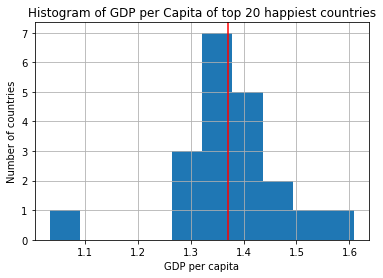

In [176]:
#Histogram of GPD per capita
df_combined['GDP per capita'].hist()
plt.axvline(x=df_combined['GDP per capita'].mean(), color='red')
plt.title('Histogram of GDP per Capita of top 20 happiest countries')
plt.xlabel('GDP per capita')
plt.ylabel('Number of countries');

In [177]:
df_combined[df_combined['GDP per capita'] < 1.1]

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Healthcare system,Cost of living index,Monthly income in USD,Purchasing power index,Population(millions)
4,12,Costa Rica,7.167,1.034,1.441,0.963,0.558,0.144,0.093,Universal government-funded,75.0,975,23.7,5094.118


The distribution of GDP per capita is right skewed with an outlier of Costa Rica at 1.034

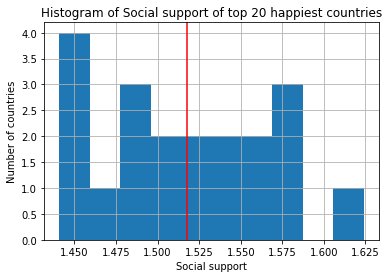

In [178]:
#Histogram of social support
df_combined['Social support'].hist()
plt.axvline(x=df_combined['Social support'].mean(), color='red')
plt.title('Histogram of Social support of top 20 happiest countries')
plt.xlabel('Social support')
plt.ylabel('Number of countries');

In [179]:
df_combined[df_combined['Social support'] > 1.6]

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Healthcare system,Cost of living index,Monthly income in USD,Purchasing power index,Population(millions)
9,4,Iceland,7.494,1.38,1.624,1.026,0.591,0.354,0.118,Universal government-funded,135.1,6071,82.0,341.243


The distribution of Social support is multimodal with an outlier of Iceland at 1.624

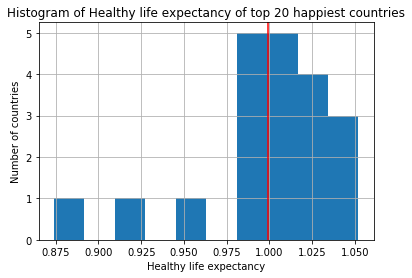

In [180]:
#Histogram of Healthy life expectancy
df_combined['Healthy life expectancy'].hist()
plt.axvline(x=df_combined['Healthy life expectancy'].mean(), color='red')
plt.title('Histogram of Healthy life expectancy of top 20 happiest countries')
plt.xlabel('Healthy life expectancy')
plt.ylabel('Number of countries');

In [181]:
df_combined[df_combined['Healthy life expectancy'] < 0.975]

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Healthcare system,Cost of living index,Monthly income in USD,Purchasing power index,Population(millions)
4,12,Costa Rica,7.167,1.034,1.441,0.963,0.558,0.144,0.093,Universal government-funded,75.0,975,23.7,5094.118
5,20,Czech Republic,6.852,1.269,1.487,0.920,0.457,0.046,0.036,Universal public,64.1,1833,52.2,10708.981
19,19,United States,6.892,1.433,1.457,0.874,0.454,0.280,0.128,Non-universal,100.0,5480,100.0,331002.651


The distribution of Healthy life expectancy is right skewed with outliers of Costa Rica, Czech Republic, and the United States.

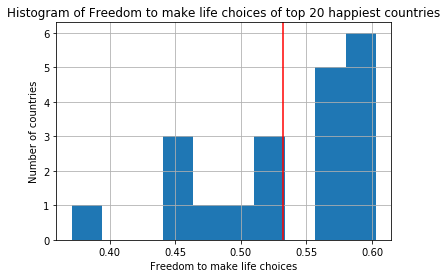

In [182]:
#Histogram of Freedom to make life choices
df_combined['Freedom to make life choices'].hist()
plt.axvline(x=df_combined['Freedom to make life choices'].mean(), color='red')
plt.title('Histogram of Freedom to make life choices of top 20 happiest countries')
plt.xlabel('Freedom to make life choices')
plt.ylabel('Number of countries');

In [183]:
df_combined[df_combined['Freedom to make life choices'] < 0.4]

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Healthcare system,Cost of living index,Monthly income in USD,Purchasing power index,Population(millions)
11,13,Israel,7.139,1.276,1.455,1.029,0.371,0.261,0.082,Universal private,118.9,3608,55.4,8655.535


In [184]:
df_combined[(df_combined['Freedom to make life choices'] > 0.4) & (df_combined['Freedom to make life choices'] < 0.55) ]

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Healthcare system,Cost of living index,Monthly income in USD,Purchasing power index,Population(millions)
1,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226,Public private,96.3,4275,81.0,9006.398
2,18,Belgium,6.923,1.356,1.504,0.986,0.473,0.160,0.210,Universal public,98.3,3946,73.3,11589.623
5,20,Czech Republic,6.852,1.269,1.487,0.920,0.457,0.046,0.036,Universal public,64.1,1833,52.2,10708.981
8,17,Germany,6.985,1.373,1.454,0.987,0.495,0.261,0.265,Public private,90.7,4043,81.3,83783.942
10,16,Ireland,7.021,1.499,1.553,0.999,0.516,0.298,0.310,Universal government-funded,110.3,5184,85.7,4937.786
12,14,Luxembourg,7.090,1.609,1.479,1.012,0.526,0.194,0.316,Universal public,111.4,6159,100.9,625.978
18,15,United Kingdom,7.054,1.333,1.538,0.996,0.450,0.348,0.278,Universal government-funded,101.3,3531,63.6,67886.011
19,19,United States,6.892,1.433,1.457,0.874,0.454,0.280,0.128,Non-universal,100.0,5480,100.0,331002.651


The distribution of Freedom to make life choices is multimodal and left skewed. There is an outlier of Isreal at 0.371. There are 8 countries that fall between .454 (United States) and 0.532 (Austria).

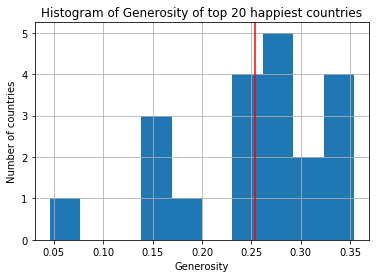

In [185]:
#Histogram of Generosity
df_combined['Generosity'].hist()
plt.axvline(x=df_combined['Generosity'].mean(), color='red')
plt.title('Histogram of Generosity of top 20 happiest countries')
plt.xlabel('Generosity')
plt.ylabel('Number of countries');

In [186]:
df_combined[df_combined['Generosity'] < 0.1]

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Healthcare system,Cost of living index,Monthly income in USD,Purchasing power index,Population(millions)
5,20,Czech Republic,6.852,1.269,1.487,0.92,0.457,0.046,0.036,Universal public,64.1,1833,52.2,10708.981


In [187]:
df_combined[(df_combined['Generosity'] > 0.1) & (df_combined['Generosity'] < 0.2) ]

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Healthcare system,Cost of living index,Monthly income in USD,Purchasing power index,Population(millions)
2,18,Belgium,6.923,1.356,1.504,0.986,0.473,0.160,0.210,Universal public,98.3,3946,73.3,11589.623
4,12,Costa Rica,7.167,1.034,1.441,0.963,0.558,0.144,0.093,Universal government-funded,75.0,975,23.7,5094.118
7,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,Universal government-funded,104.8,4132,71.9,5540.720
12,14,Luxembourg,7.090,1.609,1.479,1.012,0.526,0.194,0.316,Universal public,111.4,6159,100.9,625.978


The distribution seems to be multi-modal and left skewed with Czech Republic having the lowest score on generosity.

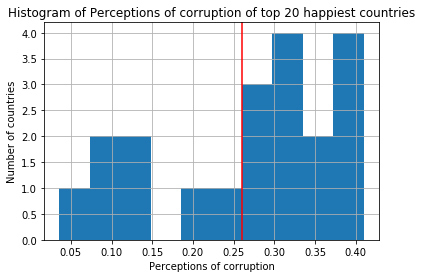

In [188]:
#Histogram of Perceptions of corruption
df_combined['Perceptions of corruption'].hist()
plt.axvline(x=df_combined['Perceptions of corruption'].mean(), color='red')
plt.title('Histogram of Perceptions of corruption of top 20 happiest countries')
plt.xlabel('Perceptions of corruption')
plt.ylabel('Number of countries');

The distribution of Perceptions of corruption is multimodal and left skewed.

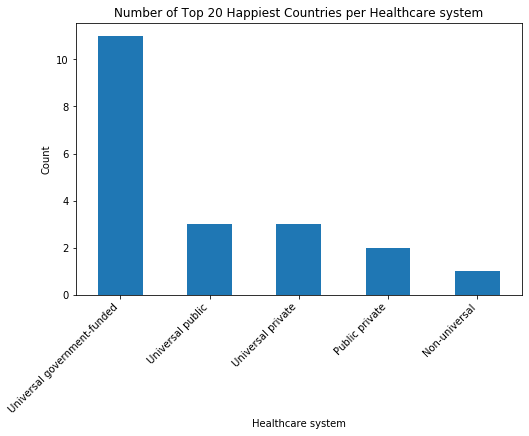

In [189]:
#Viewing the distribution of healthcare systems
df_combined['Healthcare system'].value_counts().plot(kind='bar', figsize=(8,5), align='center')
plt.xticks(rotation=45, ha='right')
plt.title('Number of Top 20 Happiest Countries per Healthcare system')
plt.xlabel('Healthcare system')
plt.ylabel('Count');

Over 1/2 of the top 20 happiest countries have a universal government funded healthcare system. 

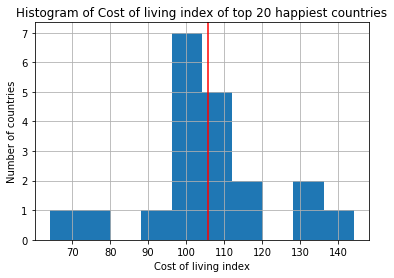

In [190]:
#Histogram of Cost of living index
df_combined['Cost of living index'].hist()
plt.axvline(x=df_combined['Cost of living index'].mean(), color='red')
plt.title('Histogram of Cost of living index of top 20 happiest countries')
plt.xlabel('Cost of living index')
plt.ylabel('Number of countries');

In [191]:
df_combined[(df_combined['Cost of living index'] > 125) | (df_combined['Cost of living index'] < 85) ]

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Healthcare system,Cost of living index,Monthly income in USD,Purchasing power index,Population(millions)
4,12,Costa Rica,7.167,1.034,1.441,0.963,0.558,0.144,0.093,Universal government-funded,75.0,975,23.7,5094.118
5,20,Czech Republic,6.852,1.269,1.487,0.920,0.457,0.046,0.036,Universal public,64.1,1833,52.2,10708.981
9,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,Universal government-funded,135.1,6071,82.0,341.243
15,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,Universal government-funded,130.5,6875,96.1,5421.241
17,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343,Universal private,144.3,7125,90.1,8654.622


The distribution of Cost of living index is normal with outliers. Costa Rica and Czech Republic have the lowest cost of living while Iceland, Norway, and Switzerland have the highest cost of living.

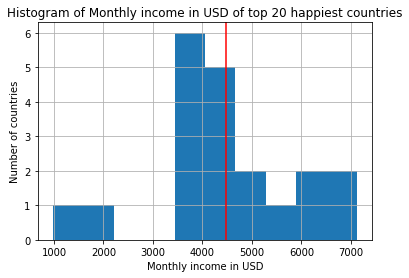

In [192]:
#Histogram of Monthly income in USD
df_combined['Monthly income in USD'].hist()
plt.axvline(x=df_combined['Monthly income in USD'].mean(), color='red')
plt.title('Histogram of Monthly income in USD of top 20 happiest countries')
plt.xlabel('Monthly income in USD')
plt.ylabel('Number of countries');

In [193]:
df_combined[(df_combined['Monthly income in USD'] < 3000)]

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Healthcare system,Cost of living index,Monthly income in USD,Purchasing power index,Population(millions)
4,12,Costa Rica,7.167,1.034,1.441,0.963,0.558,0.144,0.093,Universal government-funded,75.0,975,23.7,5094.118
5,20,Czech Republic,6.852,1.269,1.487,0.920,0.457,0.046,0.036,Universal public,64.1,1833,52.2,10708.981


Monthly income in USD has a normal distribution with outliers. Costa Rica and Czech Republic have the lowest Monthly income.

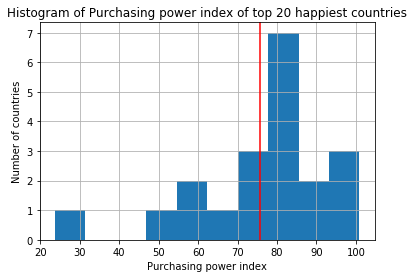

In [194]:
#Histogram of Purchasing power index
df_combined['Purchasing power index'].hist()
plt.axvline(x=df_combined['Purchasing power index'].mean(), color='red')
plt.title('Histogram of Purchasing power index of top 20 happiest countries')
plt.xlabel('Purchasing power index')
plt.ylabel('Number of countries');

In [195]:
df_combined[(df_combined['Purchasing power index'] < 40)]

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Healthcare system,Cost of living index,Monthly income in USD,Purchasing power index,Population(millions)
4,12,Costa Rica,7.167,1.034,1.441,0.963,0.558,0.144,0.093,Universal government-funded,75.0,975,23.7,5094.118


Purchasing power index is left skewed with an outlier, which is Costa Rica.

## Bivariate Exploration
I'm interested in investigating life expectancy, freedom to make life choices, healthcare systems, cost of living, and monthly income to happiness ratings. 

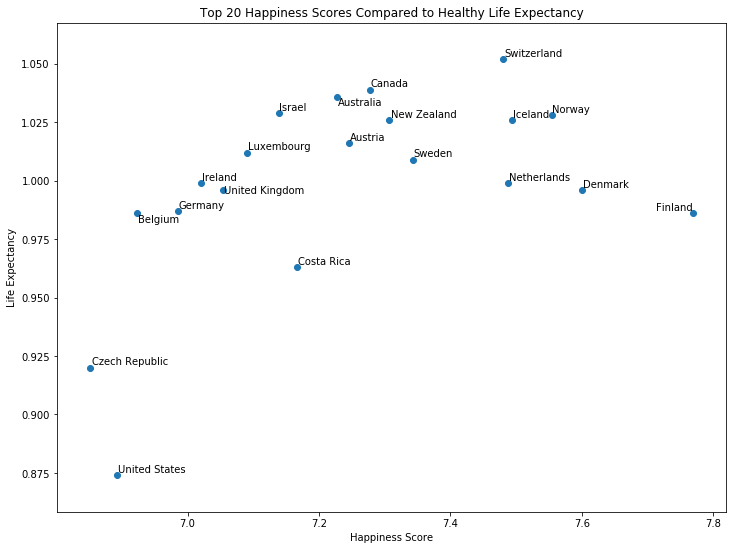

In [196]:
#Compare happiness rating with life expectancy
from adjustText import adjust_text
x = df_combined['Score']
y = df_combined['Healthy life expectancy']
n = df_combined['Country or region']

fig, ax = plt.subplots(figsize = (12, 9))
ax.scatter(x, y)
plt.title('Top 20 Happiness Scores Compared to Healthy Life Expectancy')
plt.xlabel('Happiness Score')
plt.ylabel('Life Expectancy')

texts = []
for i, txt in enumerate( n ):
    texts.append(ax.text(x[i], y[i], txt))
adjust_text(texts)
plt.show();

The United States, Czech Republic, and Costa Rica have the lowest Life Expectancy ratings.

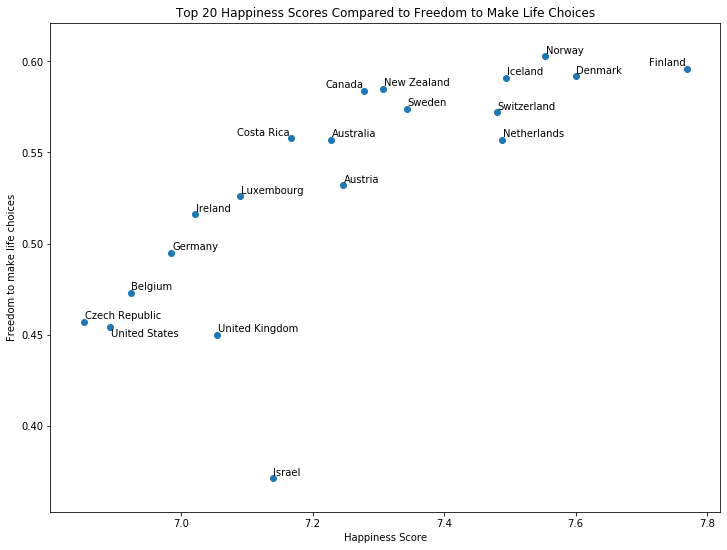

In [197]:
#Compare happiness rating with freedom to make life choices
y = df_combined['Freedom to make life choices']

fig, ax = plt.subplots(figsize = (12, 9))
ax.scatter(x, y)
plt.title('Top 20 Happiness Scores Compared to Freedom to Make Life Choices')
plt.xlabel('Happiness Score')
plt.ylabel('Freedom to make life choices')

texts = []
for i, txt in enumerate( n ):
    texts.append(ax.text(x[i], y[i], txt))
adjust_text(texts)
plt.show();

Isreal has the lowest Freedom to make life choices rating, but surprisingly, has a higher happiness rating than Czech Republic, the United States, Belgium, Germany, Ireland, and the UK.

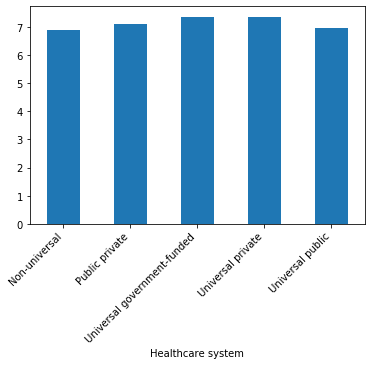

In [198]:
df_combined.groupby('Healthcare system')['Score'].mean().plot(kind='bar')
plt.xticks(rotation=45, ha='right')
plt.show;

There is some variation in Happiness compared to Healthcare system, but the plot has too little data to make any conclusions.

In [199]:
#Compare happiness rating with healthcare systems
healthcare_percent = (df_combined.groupby('Healthcare system')['Country or region'].count()/20)*100
healthcare_percent

Healthcare system
Non-universal                   5.0
Public private                 10.0
Universal government-funded    55.0
Universal private              15.0
Universal public               15.0
Name: Country or region, dtype: float64

Over half of the 20 top Happiest Countries have a Universal government-funded healthcare system.

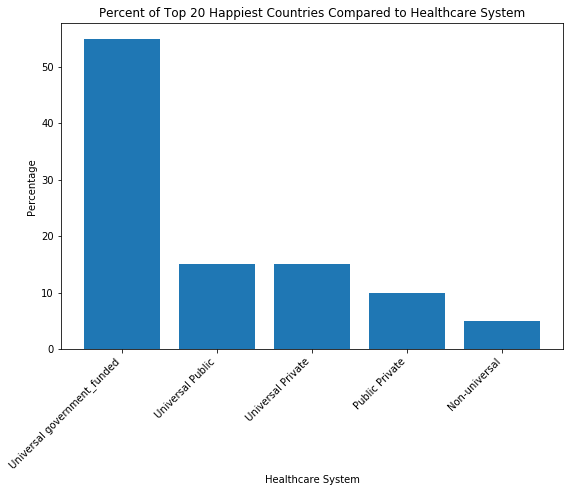

In [200]:
plt.subplots(figsize=(9,6))
healthcare_range = np.array(['Universal government_funded', 'Universal Public', 'Universal Private', 'Public Private', 'Non-universal'])
healthcare_perc = np.array([55, 15, 15, 10, 5])
plt.bar(healthcare_range, healthcare_perc)
plt.xticks(rotation=45, ha='right')
plt.title('Percent of Top 20 Happiest Countries Compared to Healthcare System')
plt.xlabel('Healthcare System')
plt.ylabel('Percentage')

plt.show;

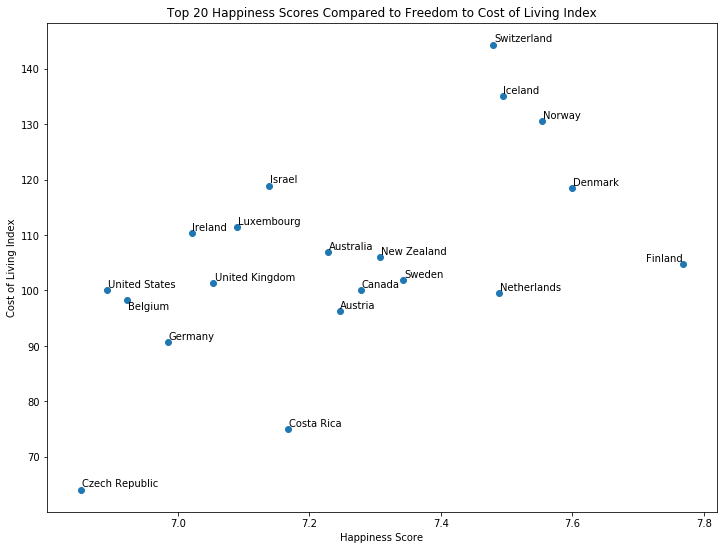

In [201]:
#Compare happiness rating with cost of living

y = df_combined['Cost of living index']

fig, ax = plt.subplots(figsize = (12, 9))
ax.scatter(x, y)
plt.title('Top 20 Happiness Scores Compared to Freedom to Cost of Living Index')
plt.xlabel('Happiness Score')
plt.ylabel('Cost of Living Index')

texts = []
for i, txt in enumerate( n ):
    texts.append(ax.text(x[i], y[i], txt))
adjust_text(texts)
plt.show();

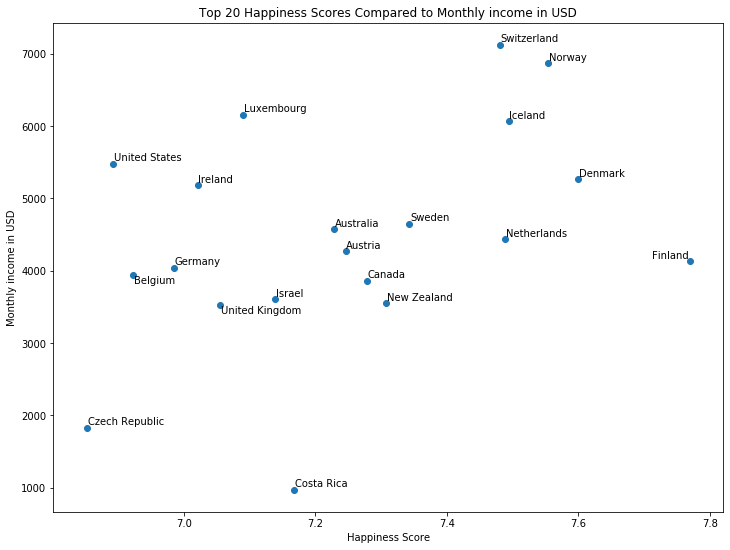

In [202]:
#Compare happiness rating with monthly income
y = df_combined['Monthly income in USD']

fig, ax = plt.subplots(figsize = (12, 9))
ax.scatter(x, y)
plt.title('Top 20 Happiness Scores Compared to Monthly income in USD')
plt.xlabel('Happiness Score')
plt.ylabel('Monthly income in USD')

texts = []
for i, txt in enumerate( n ):
    texts.append(ax.text(x[i], y[i], txt))
adjust_text(texts)
plt.show();

## Multi-variate Exploration
Evaluate life expectancy, healthcare system, monthly income, freedom to make life choices, with Happiness score

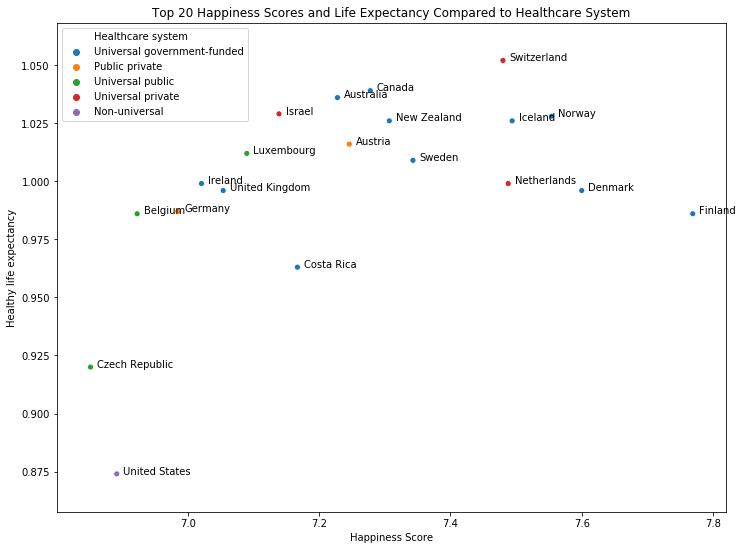

In [203]:
plt.figure(figsize=(12,9))
ax = sns.scatterplot(data=df_combined, x='Score', y='Healthy life expectancy', hue='Healthcare system')
plt.title('Top 20 Happiness Scores and Life Expectancy Compared to Healthcare System')
plt.xlabel('Happiness Score')
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.01, point['y'], str(point['val']))

label_point(df_combined['Score'], df_combined['Healthy life expectancy'], df_combined['Country or region'], plt.gca())

The United States has the lowest healthy life expectancy, which isn't surprising due to that it's the only non-universal funded healthcare system.

In [207]:
fig = px.scatter(df_combined, x="Score", y="Healthy life expectancy",size="Population(millions)", color="Healthcare system", hover_name="Country or region", size_max=70)
fig.show()

In [208]:
labels = ['$0-2000', '$2001-4000', '$4001-6000', '$6001-8000']
df_combined['Income Range'] = pd.cut(df_combined['Monthly income in USD'], [0, 2000, 4000, 6000, 8000], labels=labels)
df_combined

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Healthcare system,Cost of living index,Monthly income in USD,Purchasing power index,Population(millions),Income Range
0,11,Australia,7.228,1.372,1.548,1.036,0.557,0.332,0.290,Universal government-funded,106.9,4576,78.1,25499.884,$4001-6000
1,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226,Public private,96.3,4275,81.0,9006.398,$4001-6000
2,18,Belgium,6.923,1.356,1.504,0.986,0.473,0.160,0.210,Universal public,98.3,3946,73.3,11589.623,$2001-4000
3,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308,Universal government-funded,100.0,3864,70.5,37742.154,$2001-4000
4,12,Costa Rica,7.167,1.034,1.441,0.963,0.558,0.144,0.093,Universal government-funded,75.0,975,23.7,5094.118,$0-2000
5,20,Czech Republic,6.852,1.269,1.487,0.920,0.457,0.046,0.036,Universal public,64.1,1833,52.2,10708.981,$0-2000
6,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,Universal government-funded,118.4,5270,81.2,5792.202,$4001-6000
7,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,Universal government-funded,104.8,4132,71.9,5540.720,$4001-6000
8,17,Germany,6.985,1.373,1.454,0.987,0.495,0.261,0.265,Public private,90.7,4043,81.3,83783.942,$4001-6000
9,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,Universal government-funded,135.1,6071,82.0,341.243,$6001-8000


In [209]:
twoK=df_combined[df_combined['Income Range'] == '$0-2000']
fourK=df_combined[df_combined['Income Range'] == '$2001-4000']
sixK=df_combined[df_combined['Income Range'] == '$4001-6000']
eightK=df_combined[df_combined['Income Range'] == '$6001-8000']
fourK

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Healthcare system,Cost of living index,Monthly income in USD,Purchasing power index,Population(millions),Income Range
2,18,Belgium,6.923,1.356,1.504,0.986,0.473,0.160,0.210,Universal public,98.3,3946,73.3,11589.623,$2001-4000
3,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308,Universal government-funded,100.0,3864,70.5,37742.154,$2001-4000
11,13,Israel,7.139,1.276,1.455,1.029,0.371,0.261,0.082,Universal private,118.9,3608,55.4,8655.535,$2001-4000
14,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380,Universal government-funded,106.0,3556,61.2,4822.233,$2001-4000
18,15,United Kingdom,7.054,1.333,1.538,0.996,0.450,0.348,0.278,Universal government-funded,101.3,3531,63.6,67886.011,$2001-4000


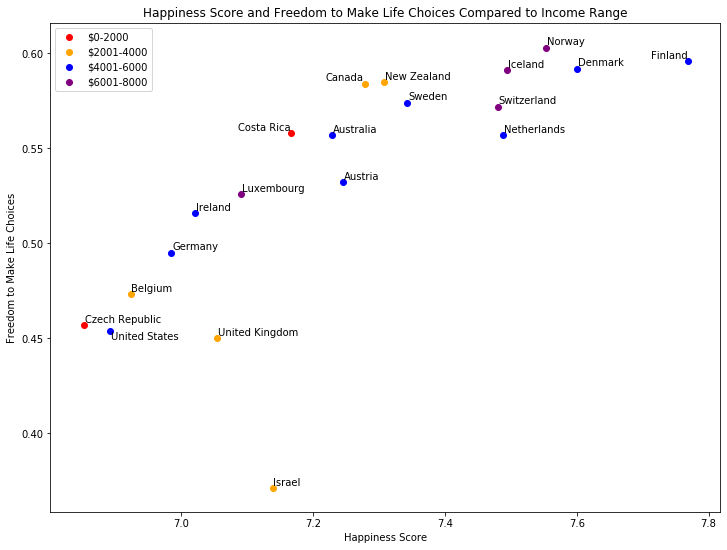

In [210]:
y = df_combined['Freedom to make life choices']

fig, ax = plt.subplots(figsize = (12,9))

colors = ['red', 'orange', 'blue', 'purple']

two = plt.scatter(twoK['Score'], twoK['Freedom to make life choices'], color=colors[0])
four = plt.scatter(fourK['Score'], fourK['Freedom to make life choices'], color=colors[1])
six = plt.scatter(sixK['Score'], sixK['Freedom to make life choices'], color=colors[2])
eight = plt.scatter(eightK['Score'], eightK['Freedom to make life choices'], color=colors[3])

plt.title('Happiness Score and Freedom to Make Life Choices Compared to Income Range')
plt.xlabel('Happiness Score')
plt.ylabel('Freedom to Make Life Choices')

texts = []
for i, txt in enumerate( n ):
    texts.append(ax.text(x[i], y[i], txt))
adjust_text(texts)

plt.legend((two, four, six, eight), 
           ('$0-2000', '$2001-4000', '$4001-6000', '$6001-8000'), 
           loc='best')

plt.show();